In [2]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

## extracttimes function
extract time stamps in log files or edgelist tensor

groupids: the group col idx used for aggregating timestamps
aggts: dict whose key is an integer(user id) and value is a list of integers(timestamp list)

In [3]:
infile = './inputData/test.reid.gz'
aggts = ioutil.extracttimes(infile, outfile=None, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
                        isbyte=True, comments='#', nodetype=str, groupids=[1])

	processing file test.reid.gz


## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

caliatpaircount function：calculate iat dict **iatpaircount** (key:(iat1, iat2), value: frequency)

get_user_iatpair_dict function：calculate iat dict **user_iatpair** (key:user, value: (iat1, iat2) list)

get_iatpair_user_dict function：calculate iat dict **iatpair_user** (key:(iat1, iat2), value: user list)

find_iatpair_user function: find users who have input iat pairs

In [4]:
instance = iatutil.IAT()

In [5]:
# calculate aggiat dict
instance.calaggiat(aggts)

In [6]:
xs, ys = instance.getiatpairs()

In [7]:
len(xs), len(ys)

(160, 160)

''

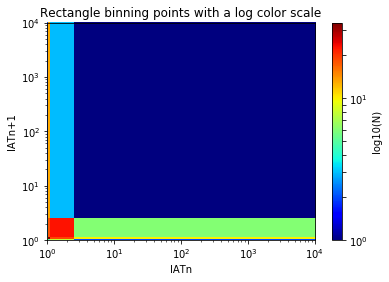

In [8]:
## invoke drawRectbin function
drawutil.drawRectbin(xs, ys, gridsize=5, xlabel='IATn', ylabel='IATn+1')

## class RectHistogram
draw function: draw 2D histogram with rectangular bin

find_peak_rects function: find the bin with the largest number of samples in the range of
horizontal axis: [x-radius, x+radius]
vertical axis: [y-radius, y+radius]
    
xbinidx, ybinidx: the bin index of bins in horizontal axis and vertical axis

''

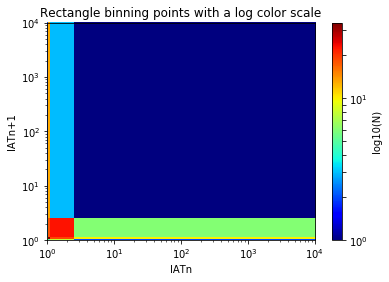

In [9]:
rect = drawutil.RectHistogram(gridsize=5)
rect.draw(xs, ys, xlabel='IATn', ylabel='IATn+1')

In [10]:
#  find the iat pairs in the bin that has the largest number of samples 
iatpairs = rect.find_peak_rect(xs, ys, x=100,y=100, radius=1000)

In [11]:
print(len(iatpairs))

34


In [12]:
# calulate user_iatpair dict (key: user list; value: iat pair)
instance.get_user_iatpair_dict()

In [13]:
user_iatpair = instance.user_iatpair
print(len(user_iatpair))

308


In [14]:
# calulate iatpair_user dict (key: iat pair; value: user list)
instance.get_iatpair_user_dict()

In [15]:
iatpair_user = instance.user_iatpair
print(len(iatpair_user))

308


In [16]:
# find users who have the iat pairs
usrlist = instance.find_iatpair_user(iatpairs)

In [17]:
print(len(usrlist))
print(usrlist[:5])

28
['1824', '3031', '601', '658', '424']
